In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
#Importing Dataset
data=pd.read_csv("/content/bank-full.csv",sep=';')

In [3]:
data.shape #Data contains 45211 rows and 17 columns 

(45211, 17)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Data PreProcessing

##Removing NULL Values

In [5]:
data = data.replace('unknown', np.nan)
data=data.replace('other',np.nan)
data.isna().sum() #There are null values

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     38799
y                0
dtype: int64

In [6]:
data.drop('contact', inplace=True, axis=1)
data.drop('poutcome', inplace=True, axis=1)
data.drop('duration',inplace=True, axis=1) #We have dropped the 'duration' variable as the value of the variable will only be known at the end of the call. Hence, at that time we will also know the outcome of the call.
data=data.dropna()
data=data.drop_duplicates()

In [7]:
data.shape #43172 rows and 14 columns


(43172, 14)

**Correlation Plot**

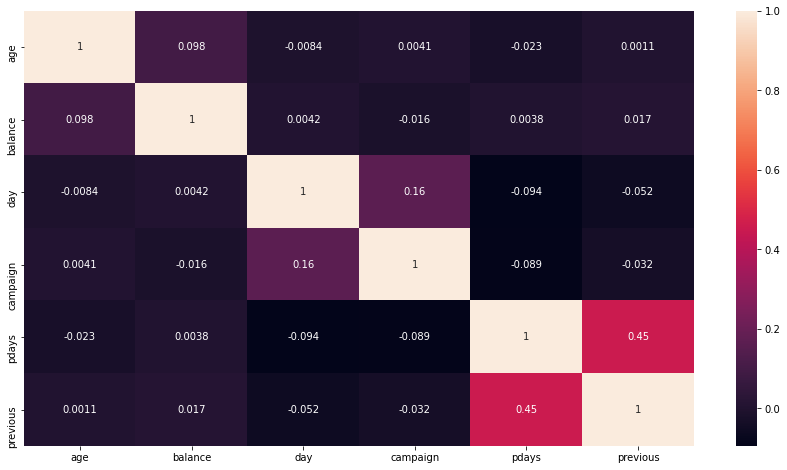

In [8]:
corrdata = data.corr()
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True)

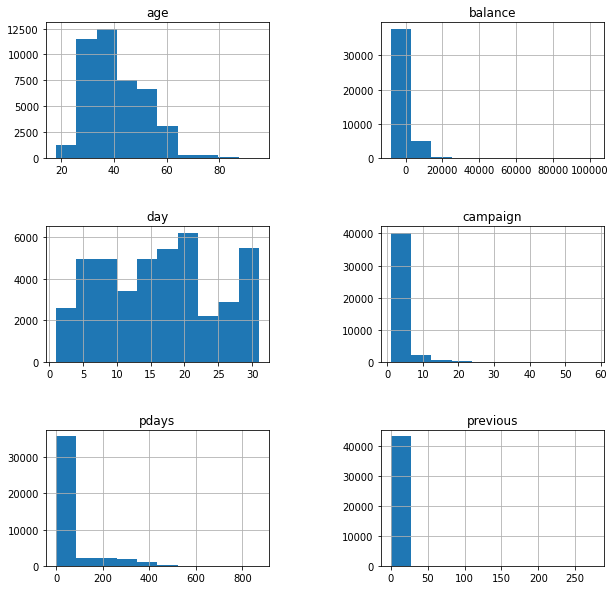

In [9]:
numerical_variables = ['age','balance','day','campaign','pdays','previous']
data.hist(column=numerical_variables,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

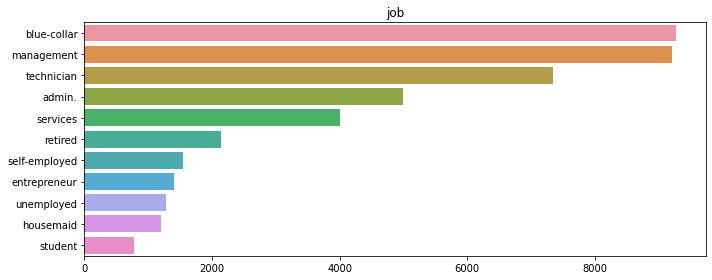

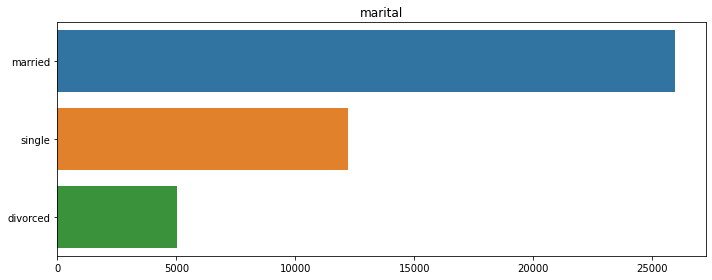

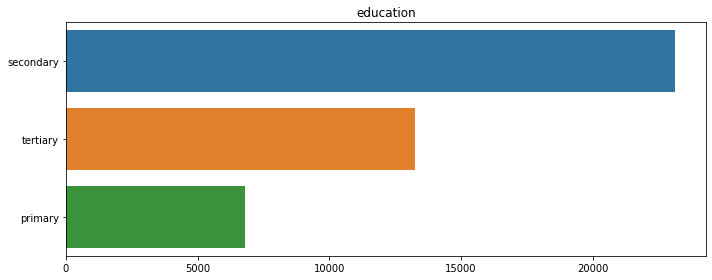

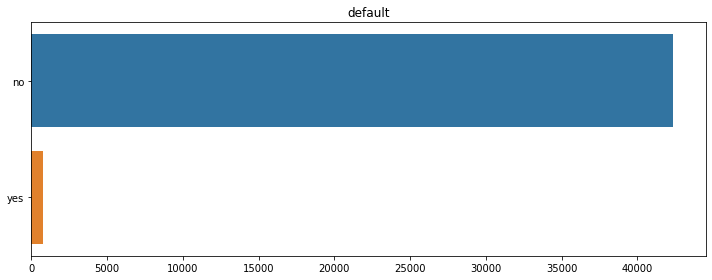

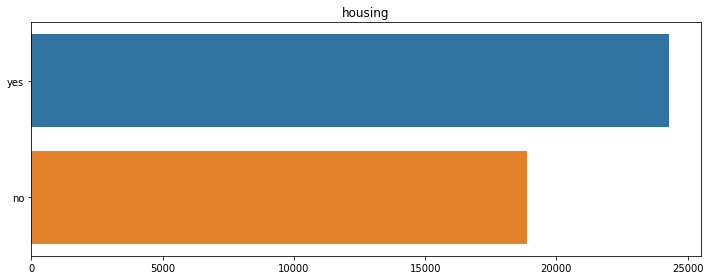

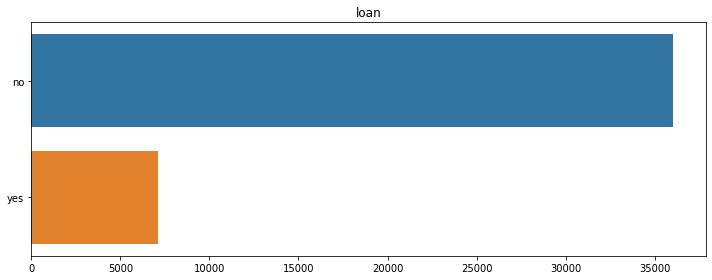

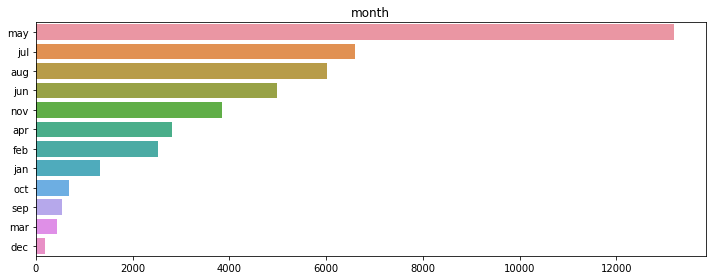

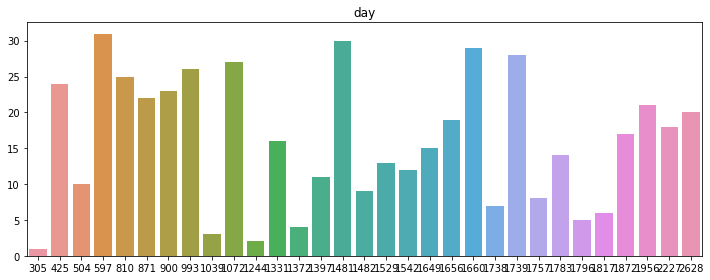

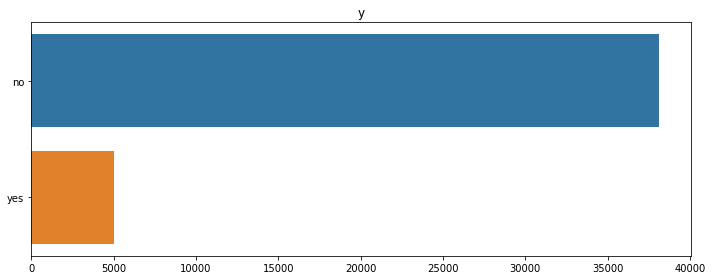

In [10]:
categorical_variables = ['job','marital', 'education', 'default', 'housing','loan', 'month', 'day','y']
for col in categorical_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

##Handling Categorical Variables

In [11]:
#ordinal
data['default'] = data['default'].map({'yes': -1,'no': 0})
data['housing'] = data['housing'].map({'yes': 1,'no': 0})
data['loan'] = data['loan'].map({'yes': 1,'no': 0})

In [12]:
#nominal
nominal = ['job','marital','education','month',]
dataProcessed = pd.get_dummies(data,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})

In [13]:
data=dataProcessed
data.head() #all values have been coverted to numerical values 

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,28,0,447,1,1,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
data.shape #43172 rows and 39 columns

(43172, 39)

# Model Building 


##Splitting into training and testing data 

In [15]:
Y=data["y"]
data.drop('y', inplace=True, axis=1)
data = pd.concat([data,Y],axis=1)

In [16]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],train_size=0.8,random_state=1)

In [17]:
trainX.head()

,age,default,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
16021,54,0,167,1,0,22,2,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
13404,60,0,2270,1,0,9,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
36531,41,0,-277,1,0,12,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
36208,35,0,189,1,0,11,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10064,54,0,1379,0,0,11,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(trainX,trainY)
pred=model.predict(testX)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,pred))

print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[7443  154]
 [ 835  203]]
Accuracy :  0.8854661262304574
Sensitivity :  0.9797288403317099
Specificity :  0.1955684007707129


In [20]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7597
           1       0.57      0.20      0.29      1038

    accuracy                           0.89      8635
   macro avg       0.73      0.59      0.61      8635
weighted avg       0.86      0.89      0.86      8635



In [21]:
import sklearn.metrics as metrics
#AUC
randomforestauc = metrics.roc_auc_score(testY , pred)
randomforestauc

0.5876486205512114

## Support Vector Classifier

In [22]:
#Normalizing the data
from keras.utils import normalize
Xtrain=normalize(trainX)
Xtest=normalize(testX)

In [23]:
from sklearn.svm import SVC
model=SVC(gamma=0.8,degree=0.8,max_iter=10000)
model.fit(trainX,trainY)
pred=model.predict(testX)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [24]:
cm1=(confusion_matrix(testY,pred))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[7597    0]
 [1038    0]]
Accuracy :  0.8797915460335842
Sensitivity :  1.0
Specificity :  0.0


In [25]:
print(classification_report(testY, pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7597
           1       0.00      0.00      0.00      1038

    accuracy                           0.88      8635
   macro avg       0.44      0.50      0.47      8635
weighted avg       0.77      0.88      0.82      8635



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
import sklearn.metrics as metrics
#AUC
supportVectorMachineauc = metrics.roc_auc_score(testY , pred)
supportVectorMachineauc

0.5

## Artificial Neural Network

In [27]:
pip install tensorflow==2.2

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import normalize

In [29]:
#Normalizing the data
from keras.utils import normalize
Xtrain=normalize(trainX)
Xtest=normalize(testX)

In [30]:
# Defining the model
tf.keras.backend.set_floatx('float64')
model=keras.models.Sequential()
#model.add(keras.layers.Flatten()) #Flattens the input
model.add(keras.layers.Dense(39,activation=tf.nn.relu)) #Adding input layer with 39 neurons and relu activation func
model.add(keras.layers.Dense(39,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
# Adam Optimiser converges faster than any other existing optimizer
# sparse categorical crossentropy combines the good of crossentropy and one hot encoding
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [31]:
model.fit(Xtrain,trainY,epochs=100)

Epoch 1/100
1080/1080 [==============================] - 2s 2ms/step - loss: 0.3574 - accuracy: 0.8846
Epoch 2/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3457 - accuracy: 0.8847
Epoch 3/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3425 - accuracy: 0.8847
Epoch 4/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3400 - accuracy: 0.8847
Epoch 5/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3380 - accuracy: 0.8847
Epoch 6/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8846
Epoch 7/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3360 - accuracy: 0.8846
Epoch 8/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8847
Epoch 9/100
1080/1080 [==============================] - 2s 1ms/step - loss: 0.3331 - accuracy: 0.8844
Epoch 10/100
1080/1080 [==============================] - 2s 1ms/step - l

In [32]:
predY = model.predict(Xtest)
y_pred_class = np.argmax(predY,axis=1)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,y_pred_class))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[7518   79]
 [ 937  101]]
Accuracy :  0.8823393167342212
Sensitivity :  0.989601158351981
Specificity :  0.09730250481695568


In [34]:
print(classification_report(testY,y_pred_class))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7597
           1       0.56      0.10      0.17      1038

    accuracy                           0.88      8635
   macro avg       0.73      0.54      0.55      8635
weighted avg       0.85      0.88      0.84      8635



In [35]:
import sklearn.metrics as metrics
#AUC
artificialNeuralNetworkauc = metrics.roc_auc_score(testY , y_pred_class)
artificialNeuralNetworkauc

0.5434518315844684

## Probabilistic Neural Network

In [36]:
!pip install neupy

  Using cached https://files.pythonhosted.org/packages/db/d3/651f95288a6cd9094f7411cdd90ef12a3d01a268009e0e3cd66b5c8d65bd/tensorflow-1.13.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bb/48/13f49fc3fa0fdf916aa1419013bb8f2ad09674c275b4046d5ee669a46873/tensorflow_estimator-1.13.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0f/39/bdd75b08a6fba41f098b6cb091b9e8c7a80e1b4d679a581a0ccd17b10373/tensorboard-1.13.1-py3-none-any.whl
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [37]:
from neupy import algorithms
from sklearn import metrics

In [38]:
pnn = algorithms.PNN(std=10,verbose=True)
pnn.train(Xtrain,trainY)


Main information

[ALGORITHM] PNN

[OPTION] batch_size = 128
[OPTION] std = 10
[OPTION] verbose = True



In [39]:
pred=pnn.predict(Xtest)
prob=pnn.predict_proba(Xtest)
print(pred)

Time: 0:01:52 | 98%|########################################### | ETA:  0:00:01

[1 1 1 ... 0 1 1]


In [40]:
y_pred = pnn.predict(testX)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
cm1=(confusion_matrix(testY,y_pred))
print('Confusion Matrix : \n', cm1)
total1=sum(sum(cm1))

accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[6312 1285]
 [ 881  157]]
Accuracy :  0.749160393746381
Sensitivity :  0.8308542845860208
Specificity :  0.151252408477842


In [42]:
print(classification_report(testY,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      7597
           1       0.11      0.15      0.13      1038

    accuracy                           0.75      8635
   macro avg       0.49      0.49      0.49      8635
weighted avg       0.79      0.75      0.77      8635



In [43]:
import sklearn.metrics as metrics
#AUC
probablisticNeuralNetworkauc = metrics.roc_auc_score(testY , y_pred)
probablisticNeuralNetworkauc

0.49105334653193133

**Comparing all the auc scores:**

In [44]:
print('random forest', randomforestauc)
print('Support Vector Machines', supportVectorMachineauc)
print('Artificial Neural Network', artificialNeuralNetworkauc)
print('Probablistic Neural Network', probablisticNeuralNetworkauc)

random forest 0.5876486205512114
Support Vector Machines 0.5
Artificial Neural Network 0.5434518315844684
Probablistic Neural Network 0.49105334653193133


In [45]:
print('best result is:' )
print(max(randomforestauc, supportVectorMachineauc, artificialNeuralNetworkauc, probablisticNeuralNetworkauc))

best result is:
0.5876486205512114
